In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
df_train = pd.read_csv('../Data/loan_sanction_train.csv')
df_test = pd.read_csv('../Data/loan_sanction_test.csv')

In [4]:
print("Train dataset : \n")
df_train.head()

Train dataset : 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
print("Test dataset : \n")
df_test.head()

Test dataset : 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
print("train dataset :", df_train.shape)

train dataset : (614, 13)


Train dataset has  rows and 13 columns.

In [14]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
all_col = list(df_train.columns)
num_col = list(df_train._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features : ", all_col)
print('\n')
print("Numerical features : ", num_col)
print('\n')
print("Catogarical features : ", cat_col)

All features :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


Numerical features :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Catogarical features :  ['Education', 'Loan_ID', 'Property_Area', 'Dependents', 'Loan_Status', 'Married', 'Self_Employed', 'Gender']


In [13]:
df_train.duplicated().sum()

0

There are no duplicate rows in that dataset.

In [20]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in that dataset.

In [15]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [41]:
for i in cal_col:
    print(i, "columns...")
    print(df_train[i].unique())
    print('\n')
    print(df_train[i].value_counts())
    print('=' * 120)

Education columns...
['Graduate' 'Not Graduate']


Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Loan_ID columns...
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 

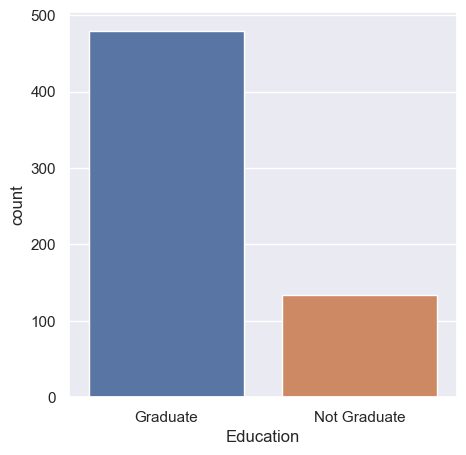

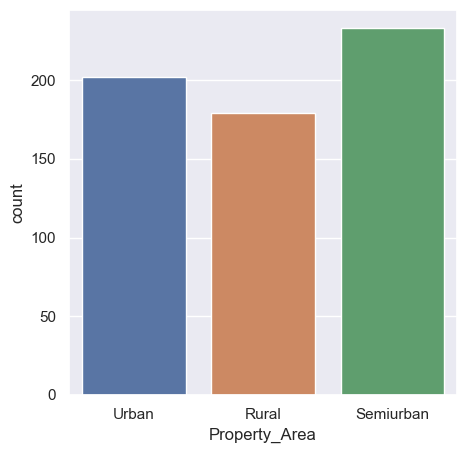

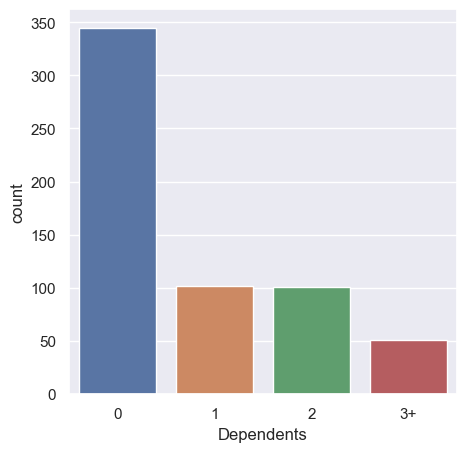

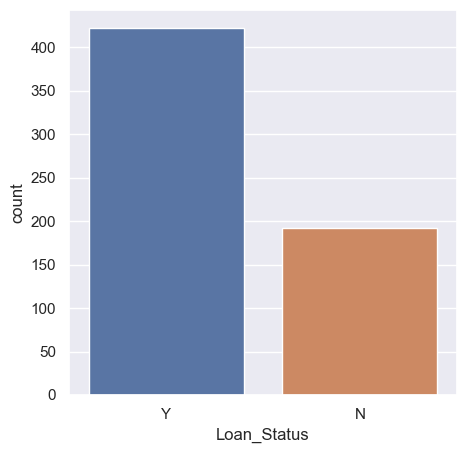

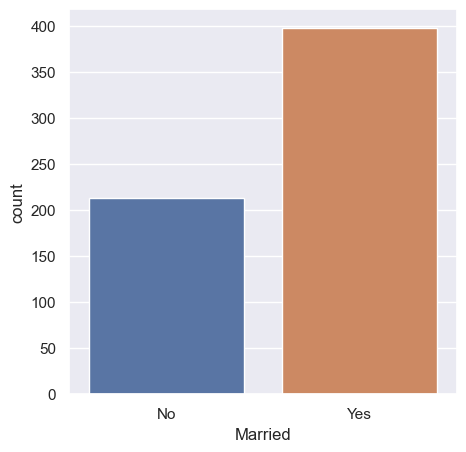

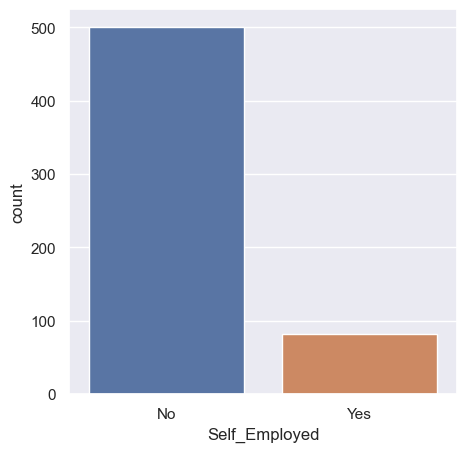

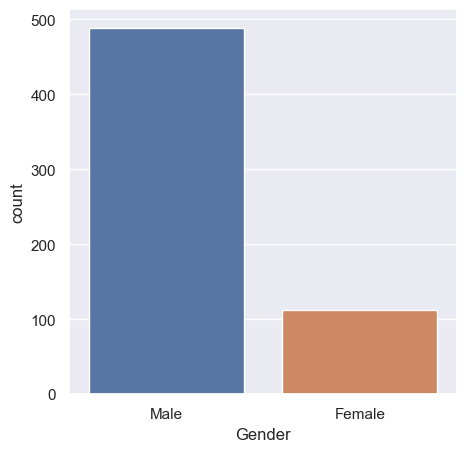

In [46]:
for i in cal_col:
    if i not in "Loan_ID":
        sns.set()
        plt.figure(figsize = (5, 5))
        sns.countplot(x = i, data = df_train)
        plt.show()
    
        print('=' * 120)

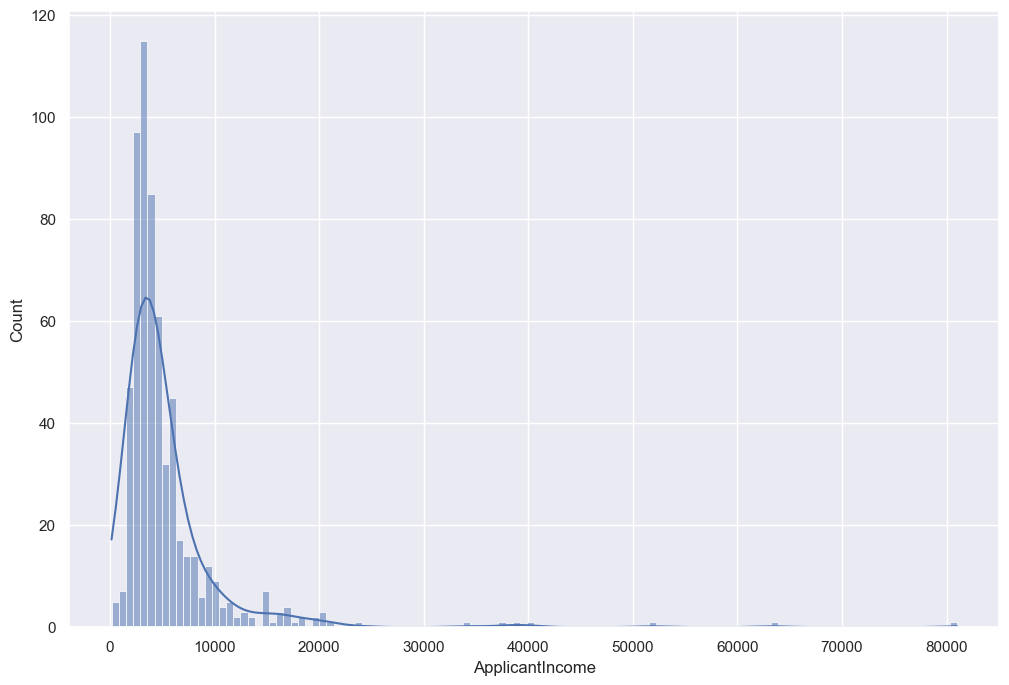

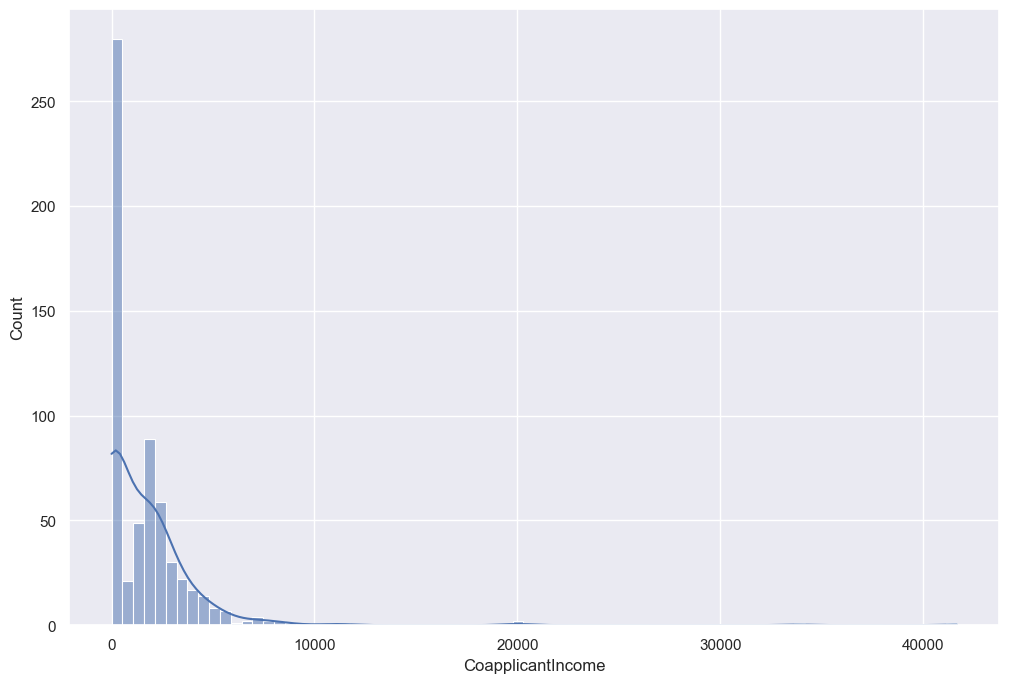

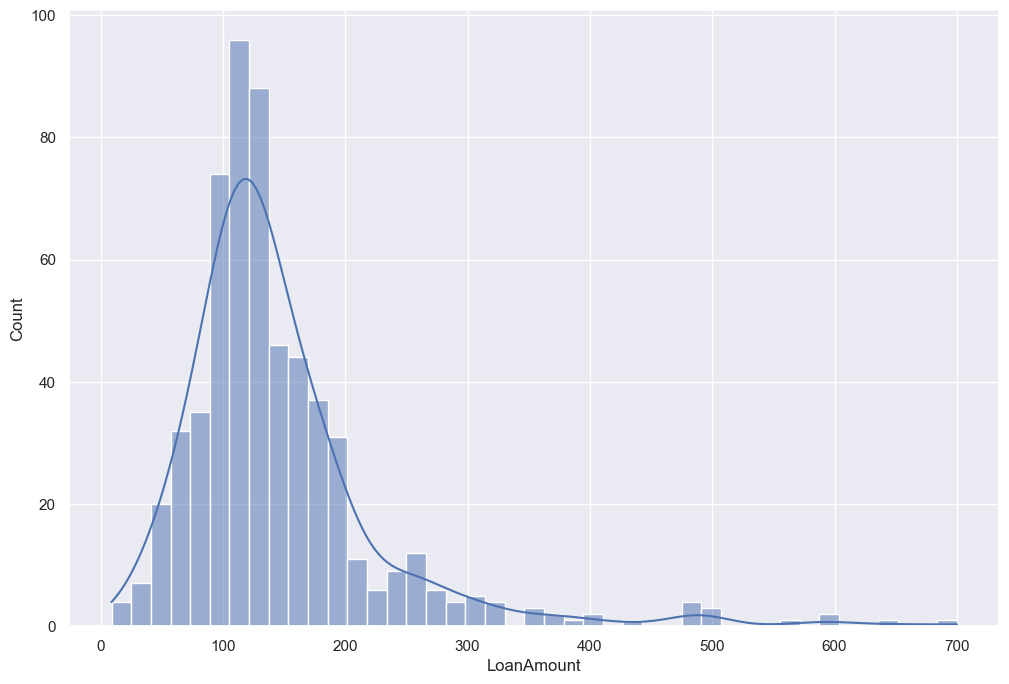

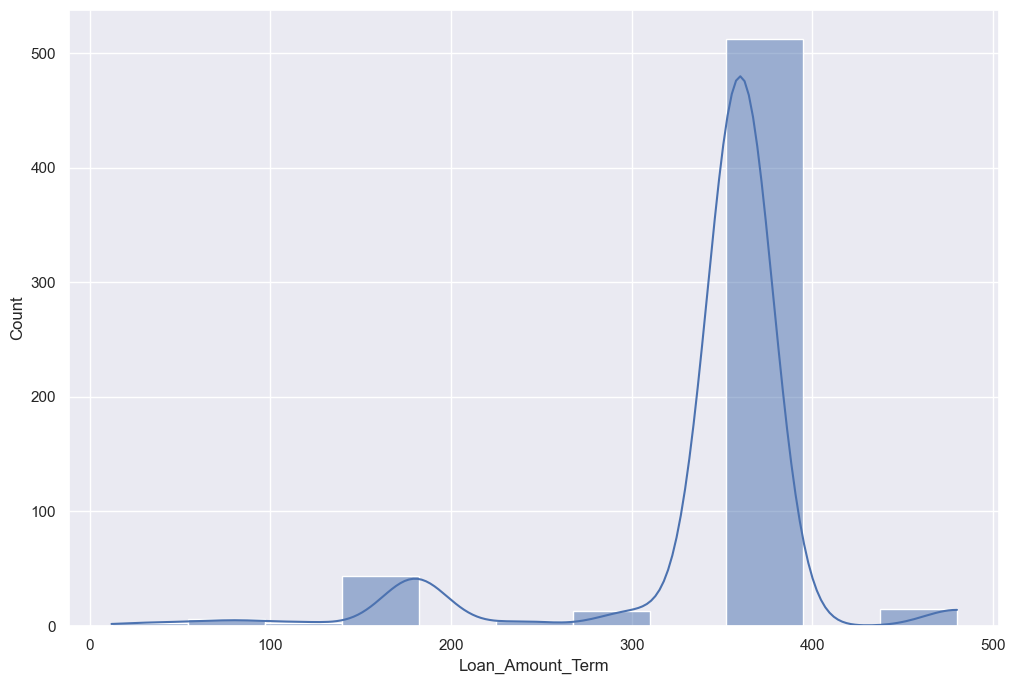

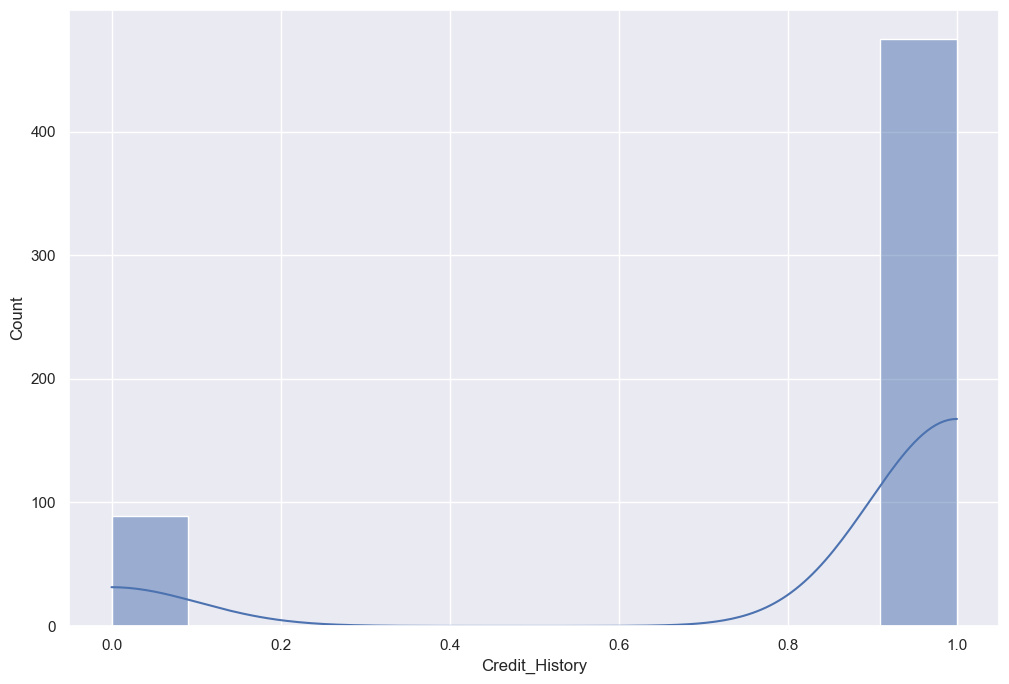

In [49]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 8))
    sns.histplot(x = i, data = df_train, kde = True)
    plt.show()
    
    print('=' * 120)

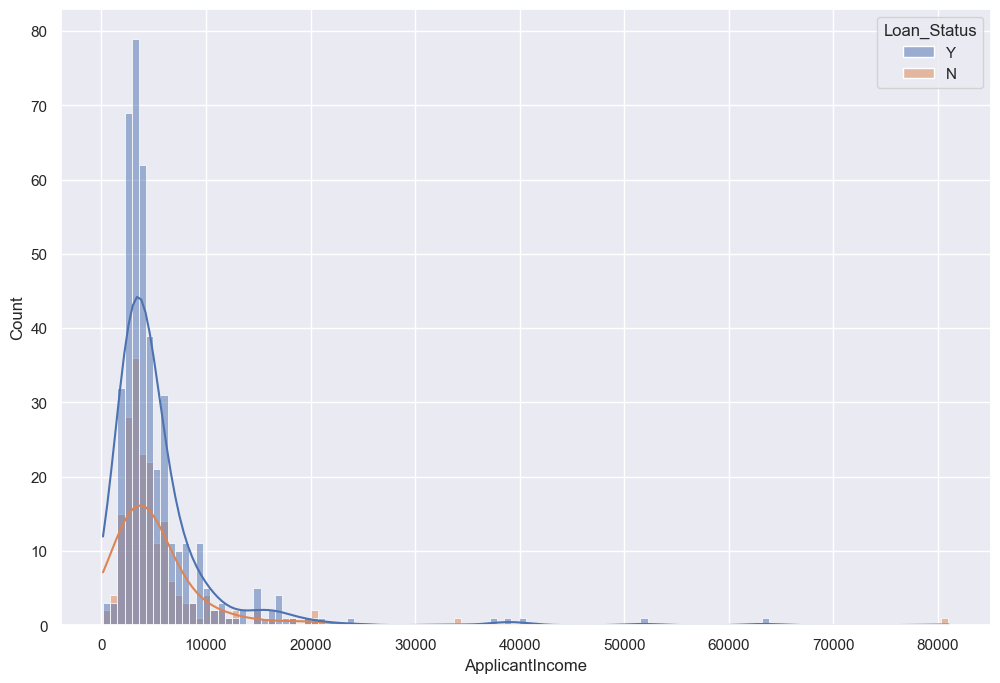

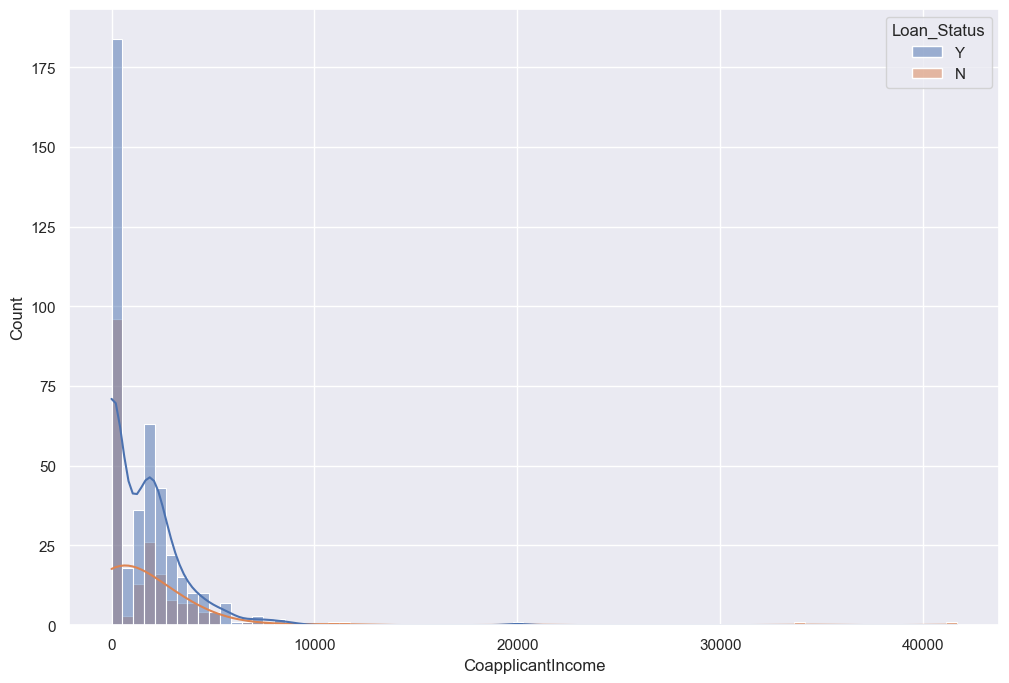

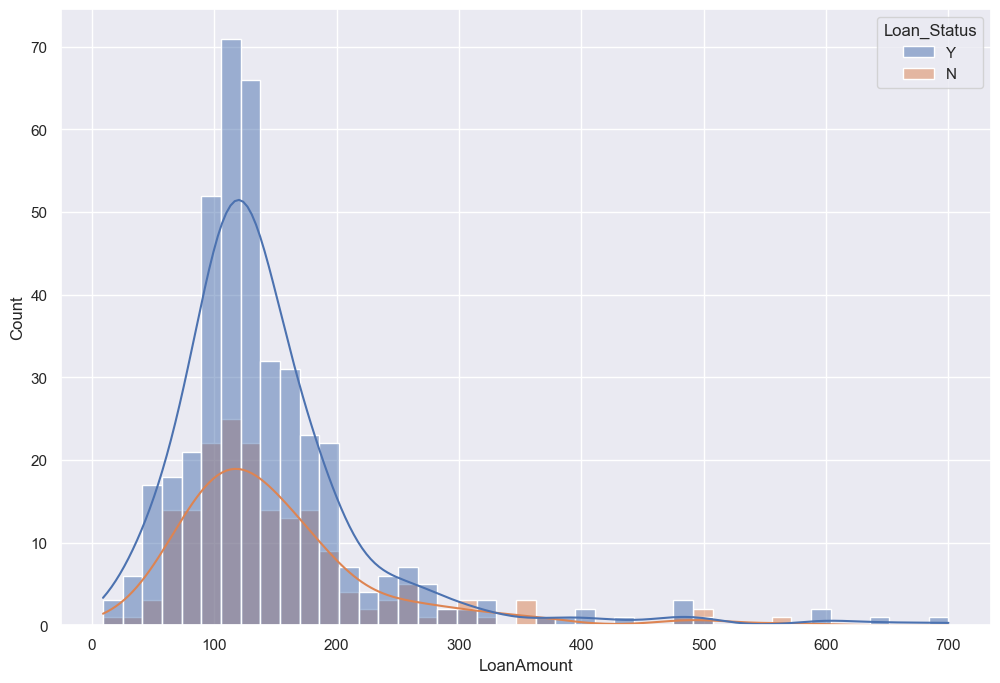

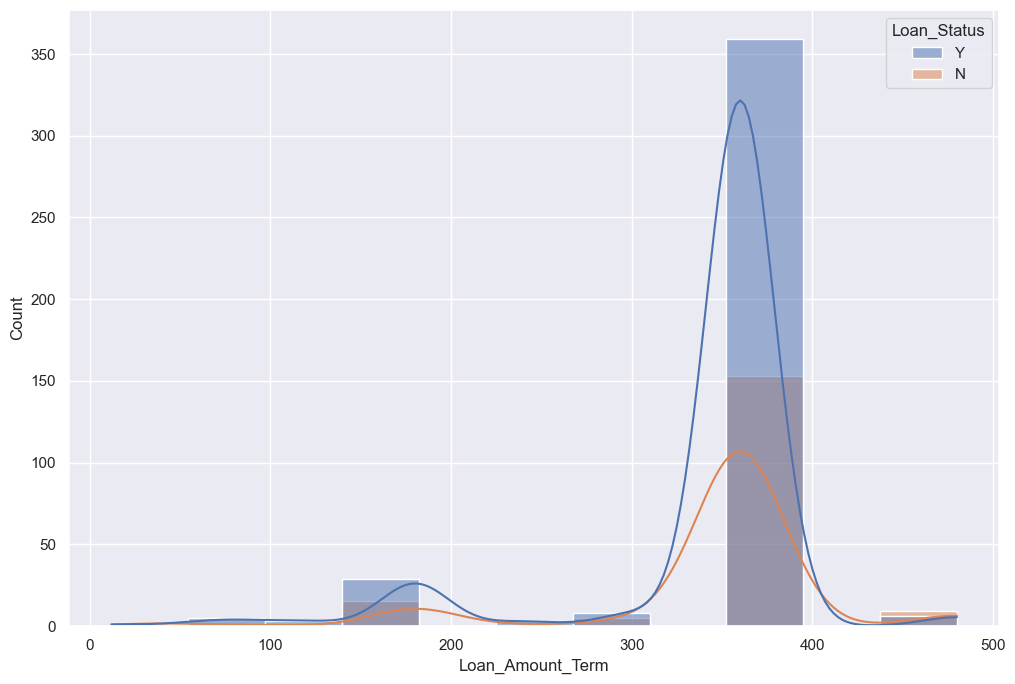

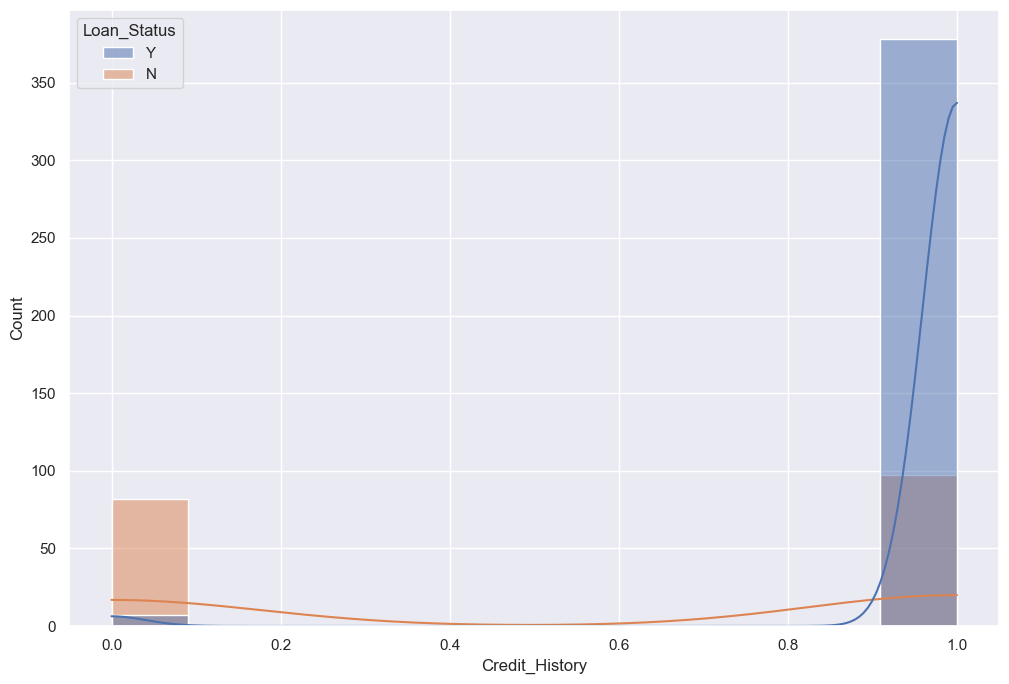

In [54]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 8))
    sns.histplot(x = i, data = df_train, kde = True, hue = "Loan_Status")
    plt.show()
    
    print('=' * 120)

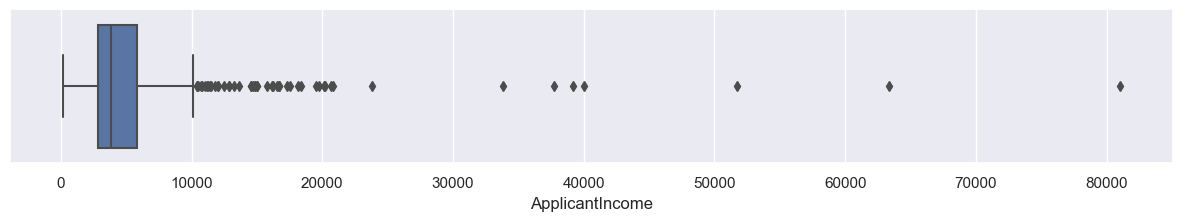

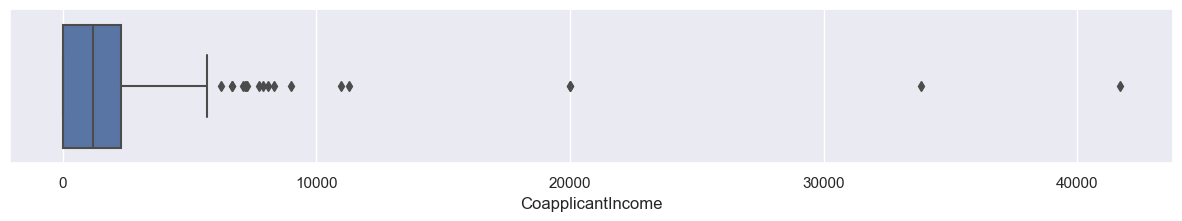

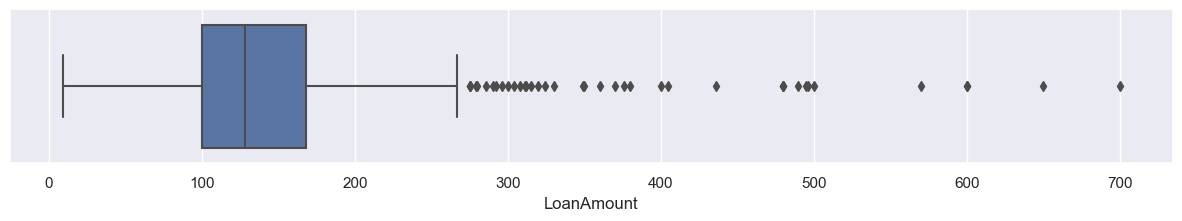

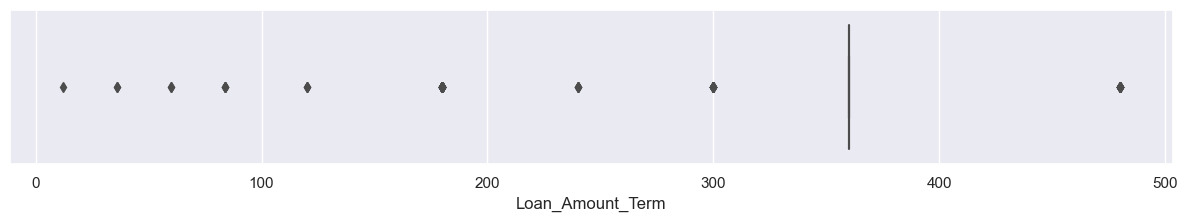

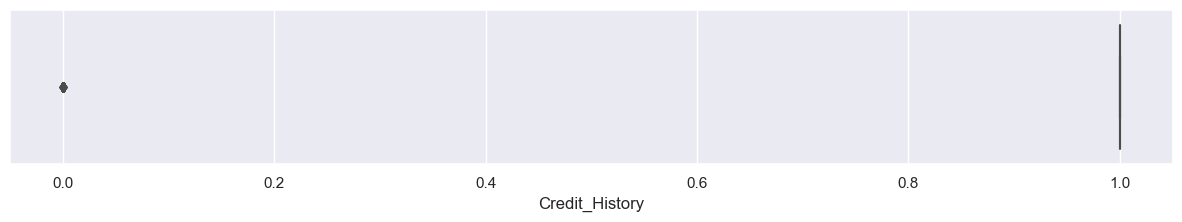

In [51]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (15, 2))
    sns.boxplot(x = i, data = df_train)
    plt.show()
    
    print('=' * 120)

In [55]:
for i in num_col:
    if i not in ['Loan_Amount_Term', 'Credit_History']:
        q1 = df_train[i].quantile(0.25)
        q3 = df_train[i].quantile(0.75)
        IQR = q3 - q1
        upper = q3 + (IQR * 1.5) 
        lower = q1 - (IQR * 1.5)
        df_train.loc[(df_train[i] > upper), i] = upper
        df_train.loc[(df_train[i] < lower), i] = lower

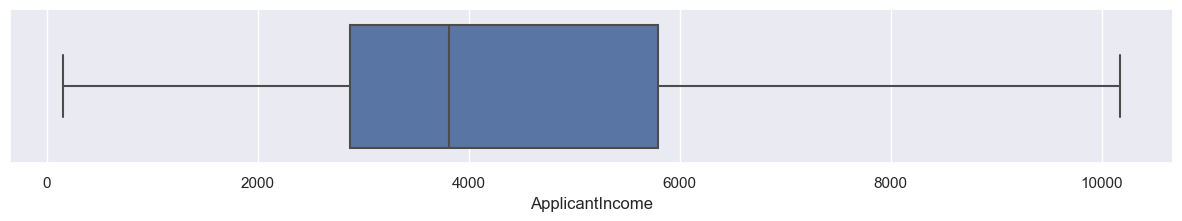

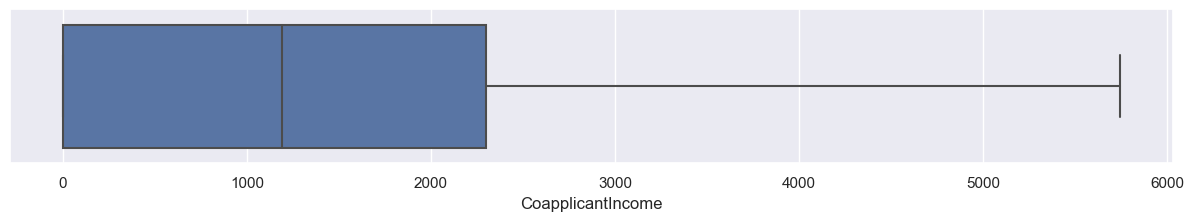

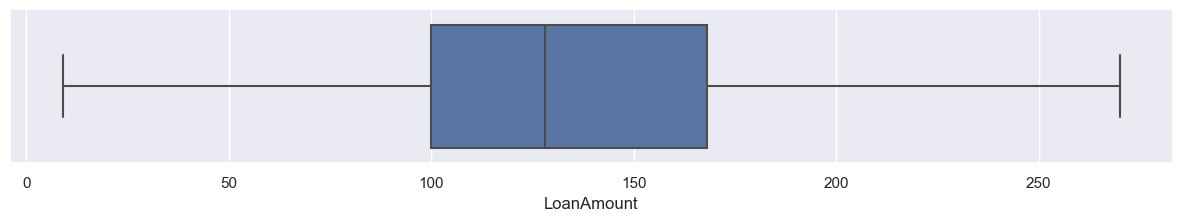

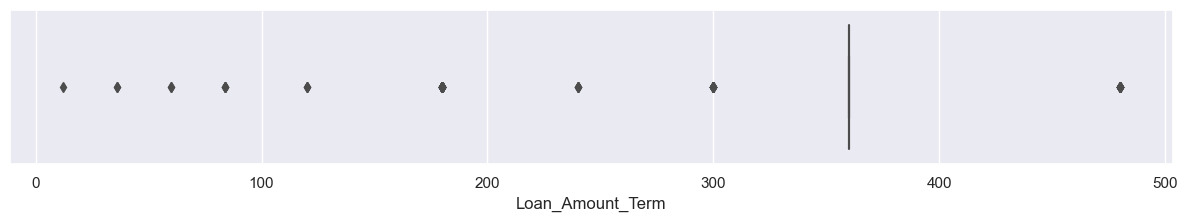

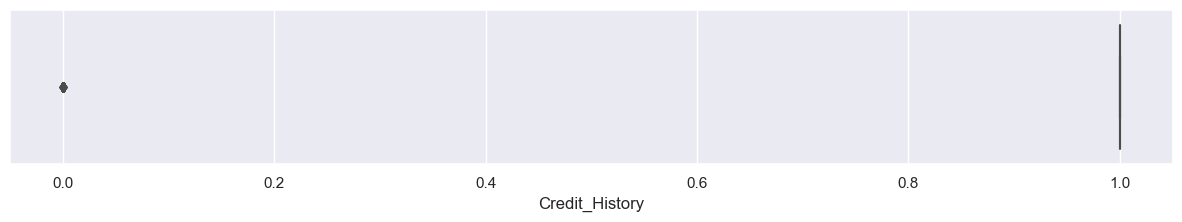

In [56]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (15, 2))
    sns.boxplot(x = i, data = df_train)
    plt.show()
    
    print('=' * 120)

# Split data

In [129]:
x = df_train.drop(columns = ['Loan_Status', 'Loan_ID'], axis = 1)
y = df_train[['Loan_Status']]

In [130]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


In [131]:
x.shape

(614, 11)

In [132]:
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [133]:
y.shape

(614, 1)

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5, train_size = 0.8)

In [179]:
print("x_train :", x_train.shape)
print("\ny_train :", y_train.shape)
print("\nx_test :", x_test.shape)
print("\ny_test :", y_test.shape)

x_train : (491, 11)

y_train : (491, 1)

x_test : (123, 11)

y_test : (123, 1)


# Preprocessing

In [180]:
all_col = list(x_train.columns)
num_col = list(x_train._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features : ", all_col)
print('\n')
print("Numerical features : ", num_col)
print('\n')
print("Catogarical features : ", cat_col)

All features :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


Numerical features :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Catogarical features :  ['Education', 'Property_Area', 'Dependents', 'Married', 'Self_Employed', 'Gender']


In [181]:
num_pipe = Pipeline(steps = [
    ("KNN_Imputer" , KNNImputer(n_neighbors = 2)),
    ("StandardScaler" , StandardScaler())
])

num_pipe

Pipeline(steps=[('KNN_Imputer', KNNImputer(n_neighbors=2)),
                ('StandardScaler', StandardScaler())])

In [182]:
cat_pipe = Pipeline(steps = [
    ("Simple_Imputer" , SimpleImputer(strategy = 'most_frequent')),
    ("encorder" , OneHotEncoder())
])

cat_pipe

Pipeline(steps=[('Simple_Imputer', SimpleImputer(strategy='most_frequent')),
                ('encorder', OneHotEncoder())])

In [183]:
preprocessor = ColumnTransformer([
   ( "Numeric", num_pipe, num_col),
    ("Catogarical", cat_pipe, cat_col)
])

preprocessor

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('KNN_Imputer',
                                                  KNNImputer(n_neighbors=2)),
                                                 ('StandardScaler',
                                                  StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('Catogarical',
                                 Pipeline(steps=[('Simple_Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encorder',
                                                  OneHotEncoder())]),
                                 ['Education', 'Property_Area', 'Dependents',
                                  'Married', 'Self_Employed', 'Gender'])])

In [184]:
preprocessor1 = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ('selector', VarianceThreshold(threshold = 0.0)),
])
preprocessor1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('KNN_Imputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('StandardScaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('Catogarical',
                                                  Pipeline(steps=[('Simple_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encorder',
                                                                   OneHotEncoder())]),
                                                  ['Education', 'Property_Area',
                                                   'Dependents', 'Married',
                                                   'Self_Employed',
                                                   'Gender'])])),
                ('selector', VarianceThreshold())])

# Model building

In [203]:
def prediction_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    
    sns.set()
    plt.figure(figsize = (5, 5))
    sns.heatmap(data = confusion_matrix(y_true, y_pred), annot = True, fmt = 'g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
    print("Accuracy score : ", accuracy_score(y_true, y_pred))
    
    plt.show()
    print('\n')

In [204]:
def model_training(model, x_train, y_train, x_test, y_test, params):
    grid_search = GridSearchCV(model, param_grid = params, cv = 5, scoring='precision')
    grid_search.fit(x_train,y_train)
    
    y_pred = grid_search.predict(x_test)
    prediction_report(y_test, y_pred)
    
    print('\n')
    print("Best parameters : ", grid_search.best_params_)
    print("Best score : ", grid_search.best_score_)
    
    return grid_search.best_estimator_

## Logistic Regression

In [205]:
param_grid = {
    'LogisticRegression__penalty': ['l1', 'l2'],               
    'LogisticRegression__C': [0.001, 0.01],   
    'LogisticRegression__solver': ['liblinear', 'lbfgs'],
}

In [206]:
lgr = Pipeline(steps = [
    ("preprocessor1", preprocessor1),
    ("LogisticRegression", LogisticRegression())
])

lgr

Pipeline(steps=[('preprocessor1',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('Numeric',
                                                                   Pipeline(steps=[('KNN_Imputer',
                                                                                    KNNImputer(n_neighbors=2)),
                                                                                   ('StandardScaler',
                                                                                    StandardScaler())]),
                                                                   ['ApplicantIncome',
                                                                    'CoapplicantIncome',
                                                                    'LoanAmount',
                                                                    'Loan_Amount_Term',
                                                                    'Credit_History']),
                                                                  ('Catogarical',
                                                                   Pipeline(steps=[('Simple_Imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encorder',
                                                                                    OneHotEncoder())]),
                                                                   ['Education',
                                                                    'Property_Area',
                                                                    'Dependents',
                                                                    'Married',
                                                                    'Self_Employed',
                                                                    'Gender'])])),
                                 ('selector', VarianceThreshold())])),
                ('LogisticRegression', LogisticRegression())])

              precision    recall  f1-score   support

           N       0.33      1.00      0.49        40
           Y       0.00      0.00      0.00        83

    accuracy                           0.33       123
   macro avg       0.16      0.50      0.25       123
weighted avg       0.11      0.33      0.16       123

Accuracy score :  0.3252032520325203


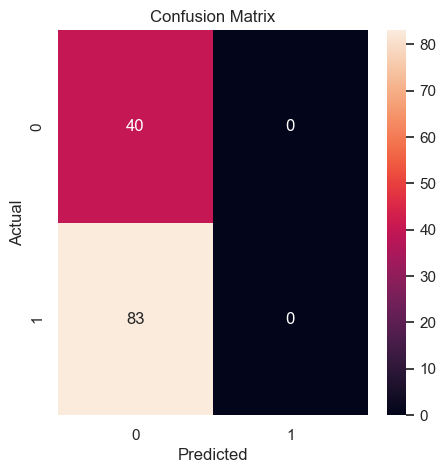





Best parameters :  {'LogisticRegression__C': 0.001, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Best score :  nan


In [207]:
lgr_best_estimator = model_training(lgr, x_train, y_train, x_test, y_test, param_grid)